In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv("netflix_scrapping.csv", encoding = "ISO-8859-1")
df2 = pd.read_csv("Imbd.csv", encoding = "ISO-8859-1")

In [3]:
df1

,Unnamed: 0,Unnamed: 0.1,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,Title
0,635,635,s636,Movie,Avengers: Infinity War,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,"December 25, 2018",2018,PG-13,150 min,"Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociop...,2018,December,Avengers: Infinity War
1,959,959,s960,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,PG-13,135 min,"Action & Adventure, Sci-Fi & Fantasy","T'Challa, the superpowered new leader of the h...",2018,September,Black Panther
2,3215,3215,s3216,Movie,Joker,Shirish Kunder,"Akshay Kumar, Sonakshi Sinha, Shreyas Talpade,...",India,"August 2, 2018",2012,TV-PG,98 min,"Comedies, International Movies, Music & Musicals",A remote village situated neither in India or ...,2018,August,Joker
3,6940,6940,s6941,Movie,The Trial of the Chicago 7,Aaron Sorkin,"Sacha Baron Cohen, Eddie Redmayne, Yahya Abdul...","United States, United Kingdom, India","October 16, 2020",2020,R,130 min,Dramas,What was supposed to be a peaceful protest tur...,2020,October,The Trial of the Chicago 7
4,7058,7058,s7059,Movie,Thor: Ragnarok,Taika Waititi,"Chris Hemsworth, Tom Hiddleston, Cate Blanchet...",United States,"June 5, 2018",2017,PG-13,131 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy",To save Asgard from a bloodthirsty goddess of ...,2018,June,Thor: Ragnarok


In [4]:
columnas = ['Title', 'director', 'type']
data = df1[columnas]
data

,Title,director,type
0,Avengers: Infinity War,"Anthony Russo, Joe Russo",Movie
1,Black Panther,Ryan Coogler,Movie
2,Joker,Shirish Kunder,Movie
3,The Trial of the Chicago 7,Aaron Sorkin,Movie
4,Thor: Ragnarok,Taika Waititi,Movie


In [ ]:
df3 = df2.rename({'Joker .': 'Joker', 'Vengadores: Infinity War .': 'Avengers: Infinity War', 'Thor: Ragnarok .': 'Thor: Ragnarok', 'El juicio de los 7 de Chicago .': 'The Trial of the Chicago 7', 'Black Panther .' : 'Black Panther'})

In [10]:
df3['Title'] = df3['Title'].replace(['Joker .'],'Joker')
df3['Title'] = df3['Title'].replace(['Vengadores: Infinity War .'],'Avengers: Infinity War')
df3['Title'] = df3['Title'].replace(['Thor: Ragnarok .'],'Thor: Ragnarok')
df3['Title'] = df3['Title'].replace(['El juicio de los 7 de Chicago .'],'The Trial of the Chicago 7')
df3['Title'] = df3['Title'].replace(['Black Panther .'],'Black Panther')

In [11]:
df3

,Unnamed: 0,Title,Rating
0,7,Joker,8.4
1,8,Avengers: Infinity War,8.4
2,17,Thor: Ragnarok,7.9
3,19,The Trial of the Chicago 7,7.8
4,38,Black Panther,7.3


### Visualización

In [43]:
def plot_data(col_name, graph_title, xlabel = 'Rating'):
    
    rating = df3[[col_name]].loc[:, col_name].sort_values(ascending=False).head(10).values
    index = df3[[col_name]].loc[:, col_name].sort_values(ascending=False).index[:10]

    sns.set_context('poster')
    sns.set(rc={'figure.figsize':(10,8)})
    sns.set_style('darkgrid')

    fig, ax = plt.subplots()
    title = []

    for i in index:
        title.append(df3.loc[i, 'Title'])

    y_pos = np.arange(len(title))

    ratings = []
    for r in rating:
        ratings.append(r)

    ax.barh(y_pos, ratings, edgecolor='black',color=('#0094FD','#1BA1FF','#37ACFF','#63BEFE',
                                                     '#83CBFD','#A6DAFF','#C2E5FF','#D7EEFF','#E6F4FF','#F5FBFF'))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(title, fontsize=10)
    ax.invert_yaxis()
    ax.set_xlabel('Rating', fontsize=10)
    ax.set_ylabel('Title', fontsize=10)
    ax.set_title(graph_title, fontsize=10)
    
    plt.show()

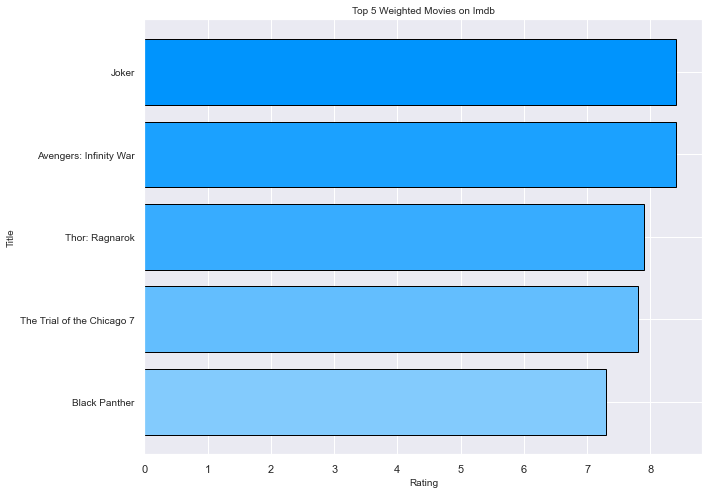

In [44]:
plot_data('Rating', 'Top 5 Weighted Movies on Imdb')